# Creation of active region area plots

Based on Figure 6 from Milbourne 2016.

In [142]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tamar.tools.settings import CsvDir

In [143]:
# csv file with rv components
csv_file = os.path.join(CsvDir.MILBOURNE, 'lat_area_plot.csv')
df = pd.read_csv(csv_file)

In [144]:
dates = df.date_obs.values
co_lat = df.co_lat.values
# co_lat = np.sin(df.co_lat.values)
area = df.area.values
# area = np.where(area>20000, 20000, area)

obs = len(np.unique(dates))
print("Number of observations: " + str(obs))

Number of observations: 3


In [145]:
int_lat = co_lat.astype(float)
co_lat = np.sin(co_lat)

Get area in microhemisphere ($\mu Hem$).
This is $10^{-6}$ of half the Sun.

In [146]:
uHem = 150e3
area_hem = area / uHem

Get the fraction of active regions for the colormap.
Not sure this is correct.

In [147]:
total = co_lat*area/np.sum(area)

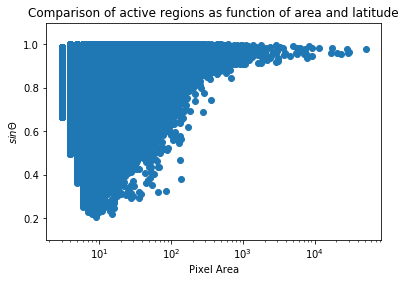

In [148]:
x = area
y = co_lat
c = total
# xlabel = 'Area ($\mu Hem$)'
xlabel = 'Pixel Area'
ylabel = '$sin \Theta$'
title = 'Comparison of active regions as function of area and latitude'

plt.scatter(x, y)
plt.xscale('Log')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.ylim(0.1, 1.1)
# plt.colorbar()
plt.show()


In [149]:
large_area = np.where(area>10000)
print(len(large_area[0]))
print(large_area)
small_areas = area
small_areas = np.where(small_areas > 10000, 10000, small_areas)

9
(array([10696, 10728, 42768, 45807, 54614, 55607, 78829, 78838, 81071]),)


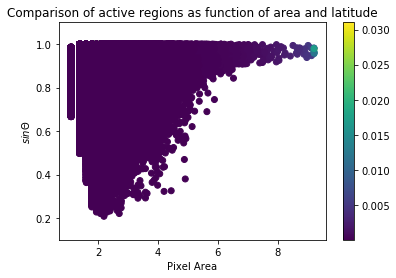

In [150]:
x = small_areas
y = co_lat
c = total
# xlabel = 'Area ($\mu Hem$)'
xlabel = 'Pixel Area'
ylabel = '$sin \Theta$'
title = 'Comparison of active regions as function of area and latitude'

plt.scatter(np.log(x), y, c=c)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.ylim(0.1, 1.1)
plt.colorbar()
plt.show()